In [1]:
# from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2 ##STrAdaBoost.R2
# from TwoStageTrAdaBoostR2 import TwoStageTrAdaBoostR2 ##two-stage TrAdaBoost.R2

import pandas as pd
import sys
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Activation, Conv2D, Dropout, Flatten
from keras import optimizers, utils, initializers, regularizers
import keras.backend as K

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler #Importing the StandardScaler

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.stats import pearsonr
from math import sqrt

#Geo plotting libraries
import geopandas as gdp
from matplotlib.colors import ListedColormap
# import geoplot as glpt

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold
import matplotlib.lines as mlines

import statistics

from scipy.stats import rv_continuous
from scipy.stats import *

from statistics import mean
from sklearn.cluster import KMeans
from scipy.spatial import distance


######### Instance Transfer repositories ####################
from adapt.instance_based import TwoStageTrAdaBoostR2

print("Repositories uploaded!!")

Repositories uploaded!!


In [2]:
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2
from sklearn.model_selection import GridSearchCV
from adapt.instance_based import KMM

print("Second Upload Completed!!")

Second Upload Completed!!


In [63]:
# Importing required Libraries for Plotting the Map

import geopandas as gpd
import json
import altair as alt
import pandas as pd

from os import listdir
from os.path import isfile, join
import glob

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns

In [64]:
########################################## Larger Dataset (US) ###############################################################

US_df = pd.read_csv('US_Monthly_2011.csv')
# US_df = US_df.sort_values(by = ['rid'])
# print("Count values before the drop: ")
# print(US_df['rid'].value_counts())
# print(US_df.isnull().sum().sum())
US_df = US_df.dropna()
# print("Count values after the drop: ")
# print(US_df['rid'].value_counts())


Source_US_df = US_df.loc[US_df['rid'].isin(['3', '4', '5', '9'])]
Target_US_df = US_df.loc[US_df['rid'].isin(['1','2','6','7','8'])]

train_Target_US_df = Target_US_df.loc[Target_US_df['rid'].isin(['2','7','8'])]
test_Target_US_df = Target_US_df.loc[Target_US_df['rid'].isin(['1','6'])]

drop_rid = ['rid']
Source_US_df = Source_US_df.drop(drop_rid, axis =1)
train_Target_US_df = train_Target_US_df.drop(drop_rid, axis =1)
test_Target_US_df = test_Target_US_df.drop(drop_rid, axis =1)

target_column = ['pm25_value']
Source_US_df_y = Source_US_df[target_column]
Source_US_df_X = Source_US_df.drop(target_column, axis = 1)

train_Target_US_df_y = train_Target_US_df[target_column]
train_Target_US_df_X = train_Target_US_df.drop(target_column, axis = 1)

test_Target_US_df_y = test_Target_US_df[target_column]
test_Target_US_df_X = test_Target_US_df.drop(target_column, axis = 1)

TF_train_X = pd.concat([Source_US_df_X, train_Target_US_df_X], sort= False)
TF_train_y = pd.concat([Source_US_df_y, train_Target_US_df_y], sort= False)

np_TF_train_X = TF_train_X.to_numpy()
np_TF_train_y = TF_train_y.to_numpy()
np_test_Target_US_df_X = test_Target_US_df_X.to_numpy()
np_test_Target_US_df_y = test_Target_US_df_y.to_numpy()

np_TF_train_y_list = np_TF_train_y.ravel()
np_test_Target_US_df_y_list = np_test_Target_US_df_y.ravel()

print(Source_US_df_X.shape)
print(train_Target_US_df_X.shape)

FileNotFoundError: [Errno 2] File US_Monthly_2011.csv does not exist: 'US_Monthly_2011.csv'

In [65]:
########################################## Shorter Individual Datasets (US) ###############################################################

US_df_train = pd.read_csv('US_data/Train/Train_7.csv')
US_train_droplist = ['cmaq_id', 'cmaq_x', 'cmaq_y', 'Latitude', 'Longitude', 'year', 'month', 'rid', 'clust']
US_df_train = US_df_train.drop(US_train_droplist, axis = 1)
US_df_train = US_df_train.rename(columns={"is": "ISS"})
print(US_df_train.columns)

US_df_transfer = pd.read_csv('US_data/Transfer/Transfer_7.csv')
# 'Latitude', 'Longitude',
US_transfer_droplist = ['cmaq_id', 'cmaq_x', 'cmaq_y', 'year', 'month', 'rid', 'clust']
US_df_transfer = US_df_transfer.drop(US_transfer_droplist, axis = 1)
US_df_transfer = US_df_transfer.rename(columns={"is": "ISS"})
print(US_df_transfer.shape)

US_df_test = pd.read_csv('US_data/Test/Test_7.csv')
# 'Latitude', 'Longitude',
US_test_droplist = ['cmaq_id', 'cmaq_x', 'cmaq_y', 'year', 'month', 'rid']
US_df_test = US_df_test.drop(US_test_droplist, axis = 1)
US_df_test = US_df_test.rename(columns={"is": "ISS"})
print(US_df_test.shape)

target_column = ['pm25_value']
US_df_train_y = US_df_train[target_column]
US_df_train_X = US_df_train.drop(target_column, axis = 1)

US_df_transfer_y = US_df_transfer[target_column]
US_df_transfer_X = US_df_transfer.drop(target_column, axis = 1)

US_df_test_y = US_df_test[target_column]
US_df_test_X = US_df_test.drop(target_column, axis = 1)

TF_train_X = pd.concat([US_df_transfer_X, US_df_train_X], sort= False)
TF_train_y = pd.concat([US_df_transfer_y, US_df_train_y], sort= False)

np_TF_train_X = TF_train_X.to_numpy()
np_TF_train_y = TF_train_y.to_numpy()

# np_TF_train_X = US_df_train_X.to_numpy()
# np_TF_train_y = US_df_train_y.to_numpy()

np_US_df_test_X = US_df_test_X.to_numpy()
np_US_df_test_y = US_df_test_y.to_numpy()

np_TF_train_y_list = np_TF_train_y.ravel()
np_US_df_test_y_list = np_US_df_test_y.ravel()


Index(['pm25_value', 'narr_dpt', 'narr_vis', 'nldas_pevapsfc',
       'nldas_dlwrfsfc', 'nldas_dswrfsfc', 'nldas_cape', 'nldas_pressfc',
       'nldas_tmp2m', 'nldas_rh2m', 'nldas_ugrd10m', 'nldas_vgrd10m',
       'forest_cover', 'elev', 'emissi11', 'local', 'ISS', 'pd', 'gc_aod'],
      dtype='object')
(3173, 21)
(1312, 21)


In [66]:
US_df_train.var()

pm25_value        5.404296e+01
narr_dpt          1.249433e+01
narr_vis          9.839851e+05
nldas_pevapsfc    4.020635e-02
nldas_dlwrfsfc    2.100485e+03
nldas_dswrfsfc    2.642533e+04
nldas_cape        3.827456e+02
nldas_pressfc     5.476174e+07
nldas_tmp2m       6.089155e+01
nldas_rh2m        2.306173e+02
nldas_ugrd10m     1.676080e+00
nldas_vgrd10m     2.129024e+00
forest_cover      1.653288e-01
elev              5.775484e+05
emissi11          6.210139e+05
local             3.584150e+05
ISS               5.203763e+02
pd                1.004739e+06
gc_aod            2.811489e-04
dtype: float64

Min Value:  -1.09166666666667
Max Value:  42.34666666666671


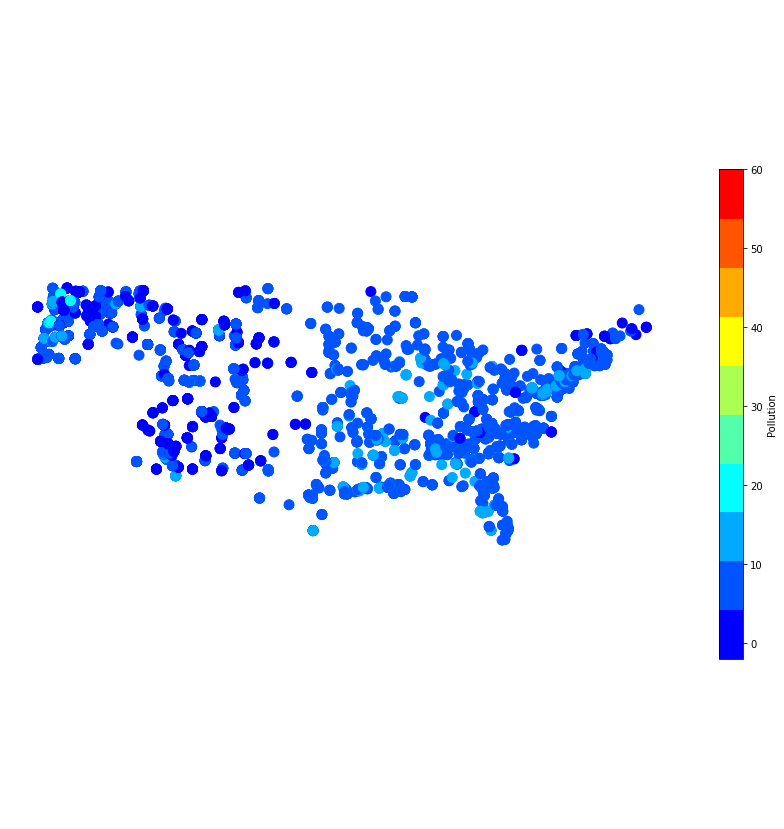

In [56]:
###################### Set up the Source 3 Plotting dataframe ######################
plot_US_df_transfer = US_df_transfer[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_df_transfer = plot_US_df_transfer.reset_index(drop = True)

print("Min Value: ",plot_US_df_transfer['pm25_value'].min())
print("Max Value: ",plot_US_df_transfer['pm25_value'].max())

fig, axs = plt.subplots(figsize = (15, 15))

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
viridis = cm.get_cmap('viridis', 12)
qualitative = cm.get_cmap('tab10')



US_US_df_transfer_map = gpd.GeoDataFrame(plot_US_df_transfer, geometry = gpd.points_from_xy(plot_US_df_transfer.Longitude, plot_US_df_transfer.Latitude)) #Create a geodataframe
US_US_df_transfer_map.plot(column = 'pm25_value', ax = axs, cmap = rainbow_colors, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.6}, 
                   vmin= -2, vmax= 60, markersize = 100) #Plot the geodatframe

# gdf_CA.plot(ax = axs, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary

axs.axis('off') # 4
plt.axis('equal') # 5

plt.savefig("US_source_7_plot")
plt.show()

In [67]:
######################################## Phase 1: Seeding Technique (US) ###################################################

kmeans = KMeans(n_clusters = 15, random_state=0).fit(US_df_transfer)

US_alternate_df = US_df_transfer.copy()
US_alternate_df_np = US_df_transfer.to_numpy()

idxlist = []
US_new_df_list = []

for rowkm in kmeans.cluster_centers_:
    mindist = -99
    rowidx = 0
    idx = 0
    for row in US_alternate_df_np:
        dst = distance.euclidean(row, rowkm)

        if(dst >= mindist):
            mindist = dst
            rowidx = idx
            rowval = row

        idx = idx + 1

#     print("Row selected: ", rowidx) #Alternate_df.loc[rowidx,:]\
#     print("Min. distance: ", mindist)
#     print("Matrix shape: ", kinematics_alternate_df_np.shape)
    US_new_df_list.append(rowval)
    US_alternate_df = np.delete(US_alternate_df_np, rowidx, 0)
    idxlist.append(rowidx)


US_new_df = pd.DataFrame(np.vstack(US_new_df_list))

print("Shape of dataset extracted: ")
print(US_new_df.shape)
print("----------------------------------------------")

Shape of dataset extracted: 
(15, 21)
----------------------------------------------


In [68]:
##################################################### Phase 2: Seeding (US) ################################################

US_alternate_transfer_df = US_df_transfer[1:].copy()
US_alternate_transfer_df_np = US_alternate_transfer_df.to_numpy()

idxlist2 = []
US_final_df_list = []

for row_nm in US_new_df_list:
    min_dist = -99
    row_idx = 0
    idx_val = 0
    for row_alt in US_alternate_transfer_df_np:
        dst = distance.euclidean(row_alt, row_nm)
        if(dst >= mindist):
            min_dist = dst
            row_idx = idx_val
            row_val = row_alt

        idx_val = idx_val + 1

#     print("Row selected: ", row_idx) #Alternate_df.loc[rowidx,:]\
#     print("Min. distance: ", min_dist)
#     print("Matrix shape: ", Elevators_alternate_source_df_np.shape)
    US_final_df_list.append(row_val)
    US_alternate_transfer_df_np = np.delete(US_alternate_transfer_df_np, row_idx, 0)
    idxlist2.append(row_idx)


US_final_df = pd.DataFrame(np.vstack(US_final_df_list), columns = US_df_transfer.columns)

print("----------------------------------------------")
print("Shape of source before :",US_df_transfer.shape)
US_df_transfer = pd.DataFrame(np.vstack(US_alternate_transfer_df_np), columns= US_df_transfer.columns)
print("Shape of source after :", US_df_transfer.shape)

print("----------------------------------------------")
print("Shape of target before :", US_df_train.shape)
US_df_train = pd.concat([US_df_train, US_final_df], ignore_index=True)
print("Shape of target after :", US_df_train.shape)

print("----------------------------------------------")

----------------------------------------------
Shape of source before : (3173, 21)
Shape of source after : (3157, 21)
----------------------------------------------
Shape of target before : (151, 19)
Shape of target after : (166, 21)
----------------------------------------------


In [69]:
################################## Finding best instances from the source dataset (US) ######################################################

US_df_transfer["ManDis"] = ""

US_df_train_mean = []
prow = US_df_train.mean()
US_df_train_mean = [prow.pm25_value, prow.narr_dpt, prow.narr_vis, prow.nldas_pevapsfc, prow.nldas_dlwrfsfc, prow.nldas_dswrfsfc, 
                          prow.nldas_cape, prow.nldas_pressfc, prow.nldas_tmp2m, prow.nldas_rh2m, prow.nldas_ugrd10m, prow.nldas_vgrd10m,
                          prow.forest_cover, prow.elev, prow.emissi11, prow.local, prow.ISS, prow.pd, prow.gc_aod]

rowidx = 0

for row in US_df_transfer.itertuples():
    row_list =[row.pm25_value, row.narr_dpt, row.narr_vis, row.nldas_pevapsfc, row.nldas_dlwrfsfc, row.nldas_dswrfsfc, 
            row.nldas_cape, row.nldas_pressfc, row.nldas_tmp2m, row.nldas_rh2m, row.nldas_ugrd10m, row.nldas_vgrd10m,
            row.forest_cover, row.elev, row.emissi11, row.local, row.ISS, row.pd, row.gc_aod]

    man_dis = 0
    for i in range(0, len(row_list)):
        tempval = US_df_train_mean[i] - row_list[i]
        man_dis = man_dis + abs(tempval)

    US_df_transfer.loc[rowidx,"ManDis"] = man_dis
    rowidx = rowidx + 1

US_df_transfer = US_df_transfer.sort_values(by =['ManDis'])
US_df_transfer = US_df_transfer.head(800) 
US_df_transfer = US_df_transfer.drop(['ManDis'], axis =1)
US_df_transfer = US_df_transfer.reset_index(drop=True)

#################### Splitting with small target set and large source and test set #############
print("Target Set: ", US_df_train.shape)
print("Source Set: ", US_df_transfer.shape)
print("Test Set: ", US_df_test.shape)


target_column = ['pm25_value']
US_df_train_y = US_df_train[target_column]
US_df_train_X = US_df_train.drop(target_column, axis = 1)

US_df_transfer_y = US_df_transfer[target_column]
US_df_transfer_X = US_df_transfer.drop(target_column, axis = 1)

US_df_test_y = US_df_test[target_column]
US_df_test_X = US_df_test.drop(target_column, axis = 1)

TF_train_X = pd.concat([US_df_transfer_X, US_df_train_X], sort= False)
TF_train_y = pd.concat([US_df_transfer_y, US_df_train_y], sort= False)

np_TF_train_X = TF_train_X.to_numpy()
np_TF_train_y = TF_train_y.to_numpy()

# np_TF_train_X = US_df_train_X.to_numpy()
# np_TF_train_y = US_df_train_y.to_numpy()

np_US_df_test_X = US_df_test_X.to_numpy()
np_US_df_test_y = US_df_test_y.to_numpy()

np_TF_train_y_list = np_TF_train_y.ravel()
np_US_df_test_y_list = np_US_df_test_y.ravel()

print("---------------------------")

###############################################################################################################################################

Target Set:  (166, 21)
Source Set:  (800, 21)
Test Set:  (1312, 21)
---------------------------


Min Value:  1.23333333333333
Max Value:  27.278494623677396


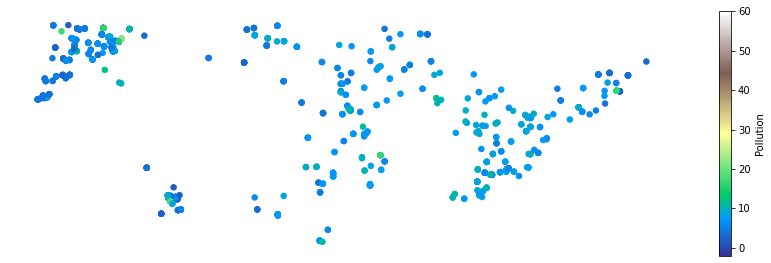

In [76]:
###################### Set up the Source 7 Plotting dataframe ######################
plot_US_df_transfer = US_df_transfer[['Longitude', 'Latitude', 'pm25_value']].copy()
plot_US_df_transfer = plot_US_df_transfer.reset_index(drop = True)

print("Min Value: ",plot_US_df_transfer['pm25_value'].min())
print("Max Value: ",plot_US_df_transfer['pm25_value'].max())

fig, axs = plt.subplots(figsize = (15, 15))

rainbow_colors = ListedColormap(['#0000ff', '#0054ff', '#00abff', '#00ffff', '#54ffab', '#abff53', '#ffff00', '#ffaa00', '#ff5400', '#ff0000']) #Using VIBGYOR for colors
viridis = cm.get_cmap('viridis', 12)
qualitative = cm.get_cmap('tab10')
magma = cm.get_cmap('magma')
reds = cm.get_cmap('autumn')
blues = cm.get_cmap('terrain')



US_df_transfer_map = gpd.GeoDataFrame(plot_US_df_transfer, geometry = gpd.points_from_xy(plot_US_df_transfer.Longitude, plot_US_df_transfer.Latitude)) #Create a geodataframe
US_df_transfer_map.plot(column = 'pm25_value', ax = axs, cmap = blues, legend = True, legend_kwds = {'label': "Pollution", 'shrink': 0.3}, 
                   vmin= -2, vmax= 60, markersize = 30) #Plot the geodatframe

# gdf_CA.plot(ax = axs, facecolor = "none", edgecolor = "black", linewidth = 1.5) #Create a plot for the CA boundary

axs.axis('off') # 4
# plt.axis('equal') # 5

plt.savefig("US_source_AS7_magma_plot")
plt.show()

In [20]:
####################### STrAdaBoost.R2 #########################################################
from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2

sample_size = [166, 800]
# sample_size = [len(US_df_train_X), len(US_df_transfer_X)]
n_estimators = 100
steps = 30
fold = 10
random_state = np.random.RandomState(1)

print("STrAdaBoost.R2 AS")
print("-------------------------------------------")

r2scorelist_stradaboost_us = []
rmselist_stradaboost_us = []

for x in range(0, 50):

    model_stradaboost_us = TwoStageTrAdaBoostR2(DecisionTreeRegressor(max_depth=6),
                          n_estimators = n_estimators, sample_size = sample_size,
                          steps = steps, fold = fold,
                          random_state = random_state)

    model_stradaboost_us.fit(np_TF_train_X, np_TF_train_y_list)
    y_pred_us = model_stradaboost_us.predict(np_US_df_test_X)

    mse_stradaboost_us = sqrt(mean_squared_error(np_US_df_test_y_list, y_pred_us))
    rmselist_stradaboost_us.append(mse_stradaboost_us)

    r2_score_stradaboost_us = pearsonr(np_US_df_test_y_list, y_pred_us)
    r2_score_stradaboost_us = (r2_score_stradaboost_us[0])**2
    r2scorelist_stradaboost_us.append(r2_score_stradaboost_us)
    
    
print("RMSE of StrAdaboost:", statistics.mean(rmselist_stradaboost_us))
print("R^2 of StrAdaboost:", statistics.mean(r2scorelist_stradaboost_us))
print("\n")
print("RMSE of StrAdaboost:", rmselist_stradaboost_us)
print("R^2 of StrAdaboost:", r2scorelist_stradaboost_us)


print("-------------------------------------------")

STrAdaBoost.R2 AS
-------------------------------------------
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaBoost.R2
Inside STrAdaB

In [15]:
####################### GBR #########################################################
print("Gradient Boosting Regression")
print("-------------------------------------------")

r2scorelist_GBRTL_us = []
rmselist_GBRTL_us = []

for x in range(0, 50):

    model_GBRTL_us = GradientBoostingRegressor(learning_rate=0.01, max_depth = 4, n_estimators=1000, subsample=0.5)
    model_GBRTL_us.fit(np_TF_train_X, np_TF_train_y_list)


    y_pred_GBRTL_us = model_GBRTL_us.predict(np_US_df_test_X) 

    rmse_GBRTL_us = sqrt(mean_squared_error(np_US_df_test_y_list, y_pred_GBRTL_us))
    rmselist_GBRTL_us.append(rmse_GBRTL_us)
    
    r2_score_GBRTL_us = pearsonr(np_US_df_test_y_list, y_pred_GBRTL_us)
    r2_score_GBRTL_us = (r2_score_GBRTL_us[0])**2
    r2scorelist_GBRTL_us.append(r2_score_GBRTL_us)
    
print("RMSE of GBR:", statistics.mean(rmselist_GBRTL_us))
print("R^2 of GBR:", statistics.mean(r2scorelist_GBRTL_us))
print("\n")
print("RMSE of GBR:", rmselist_GBRTL_us)
print("R^2 of GBR:", r2scorelist_GBRTL_us)

print("-------------------------------------------")

Gradient Boosting Regression
-------------------------------------------
RMSE of GBR: 4.783353178405265
R^2 of GBR: 0.3917969715012284


RMSE of GBR: [4.777167680246299, 4.776656488331672, 4.792167633971575, 4.77982172902257, 4.819662721441523, 4.805859486893886, 4.831131502066503, 4.759630307946516, 4.79899446865215, 4.808078307972538, 4.7689097926498025, 4.761545761751902, 4.793867387103472, 4.8147914093882695, 4.7655625937951696, 4.765246636291876, 4.779461469008211, 4.761944550174594, 4.791395899000361, 4.769362149103635, 4.765730449509007, 4.811249776692141, 4.779585665372544, 4.743549312680322, 4.780654938545946, 4.7927558303344835, 4.785782876923928, 4.810800610707273, 4.772524942200618, 4.745572891314459, 4.734878251732028, 4.804620211382785, 4.780356293136857, 4.790355004233136, 4.77102131260422, 4.812287978346956, 4.788217867993365, 4.8012932096556415, 4.765265950503049, 4.721781386814165, 4.737439532293898, 4.810729928548911, 4.751732121372508, 4.80832855705341, 4.8164623010

In [127]:
split_CA = pd.read_csv('US_data/US_multi_slice/Split_Target.csv')
target_CA = pd.read_csv('US_data/US_multi_slice/CA_target.csv')

target_CA.isnull().sum().sum()

0

In [116]:
CA_d1 = split_CA[['cmaq_id','Dataset1']]
# US_d1['Dataset1'].value_counts()

CA_train_d1 = CA_d1[US_d1['Dataset1'] == 'Training']
CA_test_d1 = CA_d1[US_d1['Dataset1'] == 'Test']

cmaqlist_train_d1 = CA_train_d1['cmaq_id'].tolist()
cmaqlist_test_d1 = CA_test_d1['cmaq_id'].tolist()

CA_train_df1 = target_CA[target_CA['cmaq_id'].isin(cmaqlist_train_d1)]
CA_train_df1 = CA_train_df1.reset_index(drop=True)
CA_train_df1

CA_test_df1 = target_CA[target_CA['cmaq_id'].isin(cmaqlist_test_d1)]
CA_test_df1 = CA_test_df1.reset_index(drop=True)
CA_test_df1

,cmaq_id,year,day,elev,emissi11,forest_cover,high,limi,local,is,...,narr_vgrd1512mb,narr_vgrd1815mb,aod_value,pm25_value,gc_aod,cmaq_x,cmaq_y,Longitude,Latitude,rid
0,53808,2011,6,-1.32055,0.0,0.067034,0.0,0.0,0.0,8.245098,...,-4.723620e+00,-3.451880e+00,0.077333,6.500000,0.003750,-1817627.483,-498157.01720,-115.529144,32.721775,6
1,53808,2011,12,-1.32055,0.0,0.067034,0.0,0.0,0.0,8.245098,...,-3.087260e+00,-2.008950e+00,0.126000,7.833333,0.003523,-1817627.483,-498157.01720,-115.529144,32.721775,6
2,53808,2011,15,-1.32055,0.0,0.067034,0.0,0.0,0.0,8.245098,...,-6.638100e+00,-3.793250e+00,0.052000,17.100000,0.002167,-1817627.483,-498157.01720,-115.529144,32.721775,6
3,53808,2011,18,-1.32055,0.0,0.067034,0.0,0.0,0.0,8.245098,...,-2.065890e+00,-1.027870e+00,0.079000,25.450000,0.008177,-1817627.483,-498157.01720,-115.529144,32.721775,6
4,53808,2011,21,-1.32055,0.0,0.067034,0.0,0.0,0.0,8.245098,...,-2.704880e+00,-5.867770e-01,0.139000,17.550000,0.003057,-1817627.483,-498157.01720,-115.529144,32.721775,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12859,95069,2011,255,1119.39000,0.0,0.856749,0.0,0.0,0.0,0.035813,...,6.666670e+19,6.666670e+19,0.264909,12.800000,0.066633,-2179276.411,620594.26136,-122.679108,41.700920,6
12860,95069,2011,261,1119.39000,0.0,0.856749,0.0,0.0,0.0,0.035813,...,6.666670e+19,6.666670e+19,0.020250,3.800000,0.001803,-2179276.411,620594.26136,-122.679108,41.700920,6
12861,95069,2011,267,1119.39000,0.0,0.856749,0.0,0.0,0.0,0.035813,...,6.666670e+19,6.666670e+19,0.148000,5.400000,0.099740,-2179276.411,620594.26136,-122.679108,41.700920,6
12862,95069,2011,297,1119.39000,0.0,0.856749,0.0,0.0,0.0,0.035813,...,6.666670e+19,6.666670e+19,0.048000,5.000000,0.001553,-2179276.411,620594.26136,-122.679108,41.700920,6


In [117]:
for i in range(1,101):
#     print(i)
    
    CA_d = split_CA[['cmaq_id','Dataset'+str(i)]]
    

    CA_train_d = CA_d[split_CA['Dataset'+str(i)] == 'Training']
    CA_test_d = CA_d[split_CA['Dataset'+str(i)] == 'Test']

    cmaqlist_train_d = CA_train_d['cmaq_id'].tolist()
    cmaqlist_test_d = CA_test_d['cmaq_id'].tolist()

    CA_train_df = target_CA[target_CA['cmaq_id'].isin(cmaqlist_train_d)]
    CA_train_df = CA_train_df.reset_index(drop=True)
    CA_train_df.to_csv('US_data/US_multi_slice/Target/Target'+str(i)+'.csv', index=False) 

    CA_test_df = target_CA[target_CA['cmaq_id'].isin(cmaqlist_test_d)]
    CA_test_df = CA_test_df.reset_index(drop=True)
    CA_test_df.to_csv('US_data/US_multi_slice/Test/Test'+str(i)+'.csv', index=False) 

In [120]:
CA = pd.read_csv('US_data/US_multi_slice/Target/Target10.csv')
CA

,cmaq_id,year,day,elev,emissi11,forest_cover,high,limi,local,is,...,narr_vgrd1512mb,narr_vgrd1815mb,aod_value,pm25_value,gc_aod,cmaq_x,cmaq_y,Longitude,Latitude,rid
0,57795,2011,6,568.3140,0.0,0.532007,0.0,0.0,72.708475,0.220588,...,1.799820,2.519480,0.01500,1.1,0.001867,-1924760.806,-389107.58230,-116.906464,33.467796,6
1,57795,2011,12,568.3140,0.0,0.532007,0.0,0.0,72.708475,0.220588,...,-2.063820,-1.240720,-0.00350,1.3,0.002693,-1924760.806,-389107.58230,-116.906464,33.467796,6
2,57795,2011,15,568.3140,0.0,0.532007,0.0,0.0,72.708475,0.220588,...,-0.627686,-0.001582,-0.01650,1.2,0.000633,-1924760.806,-389107.58230,-116.906464,33.467796,6
3,57795,2011,18,568.3140,0.0,0.532007,0.0,0.0,72.708475,0.220588,...,0.316925,0.888794,-0.03725,1.5,0.002600,-1924760.806,-389107.58230,-116.906464,33.467796,6
4,57795,2011,21,568.3140,0.0,0.532007,0.0,0.0,72.708475,0.220588,...,-0.897593,-1.065940,-0.01680,1.2,0.001170,-1924760.806,-389107.58230,-116.906464,33.467796,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,77754,2011,350,21.7346,0.0,0.000000,0.0,0.0,1028.563995,2.707665,...,-1.645890,-1.426870,0.08960,31.1,0.036450,-2171911.653,152952.69045,-121.057159,37.655949,6
1506,77754,2011,353,21.7346,0.0,0.000000,0.0,0.0,1028.563995,2.707665,...,-1.169380,-0.504644,0.16800,38.5,0.110573,-2171911.653,152952.69045,-121.057159,37.655949,6
1507,77754,2011,356,21.7346,0.0,0.000000,0.0,0.0,1028.563995,2.707665,...,-1.591500,-0.971268,0.10600,16.0,0.001567,-2171911.653,152952.69045,-121.057159,37.655949,6
1508,77754,2011,361,21.7346,0.0,0.000000,0.0,0.0,1028.563995,2.707665,...,-3.627730,-3.805710,0.05680,25.0,0.035320,-2171911.653,152952.69045,-121.057159,37.655949,6


In [3]:
########################################## Shorter Individual Datasets (US) ###############################################################
from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2

### Removing the error: Input contains NaN, infinity or a value too large for dtype('float64')
### Link used: https://stackoverflow.com/questions/31323499/sklearn-error-valueerror-input-contains-nan-infinity-or-a-value-too-large-for
### Also do reset_index for the dataframe

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame) #"df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


for i in range(1,101):
    US_df_train = pd.read_csv('US_data/US_multi_slice/Target/Target'+str(i)+'.csv')
    US_train_droplist = ['cmaq_id', 'cmaq_x', 'cmaq_y', 'Latitude', 'Longitude', 'year', 'day', 'rid']
    US_df_train = US_df_train.drop(US_train_droplist, axis = 1)
    US_df_train = US_df_train.rename(columns={"is": "ISS"})
    US_df_train = clean_dataset(US_df_train)
    US_df_train = US_df_train.reset_index(drop=True)
    print(US_df_train.shape)

    US_df_transfer = pd.read_csv('US_data/US_multi_slice/US_source.csv')
    US_transfer_droplist = ['cmaq_id', 'cmaq_x', 'cmaq_y', 'Latitude', 'Longitude', 'year', 'day', 'rid']
    US_df_transfer = US_df_transfer.drop(US_transfer_droplist, axis = 1)
    US_df_transfer = US_df_transfer.rename(columns={"is": "ISS"})
    US_df_transfer = clean_dataset(US_df_transfer)
    US_df_transfer = US_df_transfer.reset_index(drop=True)
    print(US_df_transfer.shape)

    US_df_test = pd.read_csv('US_data/US_multi_slice/Test/Test'+str(i)+'.csv')
    US_test_droplist = ['cmaq_id', 'cmaq_x', 'cmaq_y', 'Latitude', 'Longitude', 'year', 'day', 'rid']
    US_df_test = US_df_test.drop(US_test_droplist, axis = 1)
    US_df_test = US_df_test.rename(columns={"is": "ISS"})
    US_df_test = clean_dataset(US_df_test)
    US_df_test = US_df_test.reset_index(drop=True)
    print(US_df_test.shape)

    target_column = ['pm25_value']
    US_df_train_y = US_df_train[target_column]
    US_df_train_X = US_df_train.drop(target_column, axis = 1)

    US_df_transfer_y = US_df_transfer[target_column]
    US_df_transfer_X = US_df_transfer.drop(target_column, axis = 1)

    US_df_test_y = US_df_test[target_column]
    US_df_test_X = US_df_test.drop(target_column, axis = 1)

    TF_train_X = pd.concat([US_df_transfer_X, US_df_train_X], sort= False)
    TF_train_y = pd.concat([US_df_transfer_y, US_df_train_y], sort= False)

    np_TF_train_X = TF_train_X.to_numpy()
    np_TF_train_y = TF_train_y.to_numpy()

    # np_TF_train_X = US_df_train_X.to_numpy()
    # np_TF_train_y = US_df_train_y.to_numpy()

    np_US_df_test_X = US_df_test_X.to_numpy()
    np_US_df_test_y = US_df_test_y.to_numpy()

    np_TF_train_y_list = np_TF_train_y.ravel()
    np_US_df_test_y_list = np_US_df_test_y.ravel()
    
    
    from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2


    sample_size = [len(US_df_train_X), len(US_df_transfer_X)]
    n_estimators = 100
    steps = 30
    fold = 10
    random_state = np.random.RandomState(1)

    print("TL Round:")
    print("-------------------------------------------")

    r2scorelist_stradaboost_us = []
    rmselist_stradaboost_us = []
    
    r2scorelist_GBRTL_us = []
    rmselist_GBRTL_us = []
    
    r2scorelist_AdaTL_us = []
    rmselist_AdaTL_us = []


    for x in range(0, 20):
        
#         ###################################### STrAdaBoost.R2 ##########################################################
#         model_stradaboost_us = TwoStageTrAdaBoostR2(DecisionTreeRegressor(max_depth=6),
#                               n_estimators = n_estimators, sample_size = sample_size,
#                               steps = steps, fold = fold,
#                               random_state = random_state)

#         model_stradaboost_us.fit(np_TF_train_X, np_TF_train_y_list)
#         y_pred_us = model_stradaboost_us.predict(np_US_df_test_X)

#         mse_stradaboost_us = sqrt(mean_squared_error(np_US_df_test_y_list, y_pred_us))
#         rmselist_stradaboost_us.append(mse_stradaboost_us)

#         r2_score_stradaboost_us = pearsonr(np_US_df_test_y_list, y_pred_us)
#         r2_score_stradaboost_us = (r2_score_stradaboost_us[0])**2
#         r2scorelist_stradaboost_us.append(r2_score_stradaboost_us)
        
        ########################################### GBR #####################################################
        print("GBR:")
        model_GBRTL_us = GradientBoostingRegressor(learning_rate = 0.01, max_depth = 6, n_estimators = 100, subsample = 0.5)
        model_GBRTL_us.fit(np_TF_train_X, np_TF_train_y_list)


        y_pred_GBRTL_us = model_GBRTL_us.predict(np_US_df_test_X) 

        rmse_GBRTL_us = sqrt(mean_squared_error(np_US_df_test_y_list, y_pred_GBRTL_us))
        rmselist_GBRTL_us.append(rmse_GBRTL_us)

        r2_score_GBRTL_us = pearsonr(np_US_df_test_y_list, y_pred_GBRTL_us)
        r2_score_GBRTL_us = (r2_score_GBRTL_us[0])**2
        r2scorelist_GBRTL_us.append(r2_score_GBRTL_us)

        ########################################### AdaBoost TL #####################################################
        print("Ada TL:")
        model_AdaTL_us = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), learning_rate = 0.01, n_estimators = 100) 
        model_AdaTL_us.fit(np_TF_train_X, np_TF_train_y_list)
    
        y_pred_AdaTL_us = model_AdaTL_us.predict(np_US_df_test_X) 

        rmse_AdaTL_us = sqrt(mean_squared_error(np_US_df_test_y_list, y_pred_AdaTL_us))
        rmselist_AdaTL_us.append(rmse_AdaTL_us)

        r2_score_AdaTL_us = pearsonr(np_US_df_test_y_list, y_pred_AdaTL_us)
        r2_score_AdaTL_us = (r2_score_AdaTL_us[0])**2
        r2scorelist_AdaTL_us.append(r2_score_AdaTL_us)
        

    with open('US_data/US_multi_slice/Results/us_rmse'+str(i)+'.txt', 'a') as us_data_rmse:
#         us_data_rmse.write("STrAdaBoost TL:\n ")
#         us_data_rmse.writelines("%s\n" % ele for ele in rmselist_stradaboost_us)

        us_data_rmse.write("\n\nGBRTL:\n ")
        us_data_rmse.writelines("%s\n" % ele for ele in rmselist_GBRTL_us)

        us_data_rmse.write("\n\nAdaBoost TL:\n ")
        us_data_rmse.writelines("%s\n" % ele for ele in rmselist_AdaTL_us)


    with open('US_data/US_multi_slice/Results/us_r2'+str(i)+'.txt', 'a') as us_data_r2:
#         us_data_r2.write("STrAdaBoost TL:\n ")
#         us_data_r2.writelines("%s\n" % ele for ele in r2scorelist_stradaboost_us)

        us_data_r2.write("\n\nGBRTL:\n ")
        us_data_r2.writelines("%s\n" % ele for ele in r2scorelist_GBRTL_us)

        us_data_r2.write("\n\nAdaBoost TL:\n ")
        us_data_r2.writelines("%s\n" % ele for ele in r2scorelist_AdaTL_us)



(1772, 55)
(57713, 55)
(12571, 55)
TL Round:
-------------------------------------------
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
(1408, 55)
(57713, 55)
(12935, 55)
TL Round:
-------------------------------------------
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
(1560, 55)
(57713, 55)
(12783, 55)
TL Round:
-------------------------------------------
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
Ada TL:
GBR:
